In [11]:
import sklearn
print(sklearn.__version__)


1.7.2


In [16]:
!pip install imbalanced-learn


  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\farah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
print(df.columns)



Index(['provider', 'ip_claim_sum', 'ip_claim_mean', 'ip_claim_max',
       'ip_deductible_sum', 'ip_deductible_mean', 'ip_unique_patients',
       'ip_deceased_patients', 'op_claim_sum', 'op_claim_mean', 'op_claim_max',
       'op_deductible_sum', 'op_deductible_mean', 'op_unique_patients',
       'op_deceased_patients', 'potentialfraud', 'total_claim_sum',
       'total_claim_mean', 'total_deductible_sum', 'total_deductible_mean',
       'total_unique_patients', 'total_deceased_patients',
       'deceased_patient_ratio', 'claim_per_patient', 'ip_op_claim_ratio',
       'ip_max_mean_ratio', 'chronic_cond_ratio', 'avg_claim_per_deceased'],
      dtype='object')


In [33]:
pip install nbformat


   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   --------------- ------------------------ 30.7/78.5 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 78.5/78.5 kB 874.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/90.0 kB ? eta -:--:--
   ---------------------------------------- 90.0/90.0 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/67.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/67.6 kB ? eta -:--:--
   ---------------------------------------- 67.6/67.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/235.7 kB ? eta -:--:--
   ------------------- -------------------- 112.6/235.7 kB 3.3 MB/s eta 0:00:01
   ---------------------------------- ----- 204.8/235.7 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 235.7/235.7 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\farah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [35]:
import nbformat

with open("eval.ipynb") as f:
    nb = nbformat.read(f, as_version=4)

nbformat.validate(nb)
print("Notebook is valid!")


NotJSONError: Notebook does not appear to be JSON: ''

In [17]:
# ============================================
# 📌 0. IMPORT LIBRARIES
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
)
from imblearn.over_sampling import SMOTE
import joblib


In [24]:
# ============================================
# 📌 1. LOAD DATA
# ============================================
df = pd.read_csv("../data/provider_final_features.csv")

# Convert target to numeric: 'No' -> 0, 'Yes' -> 1
df['potentialfraud'] = df['potentialfraud'].map({'No': 0, 'Yes': 1})

# Define features and target
X = df.drop(columns=["provider", "potentialfraud"])
y = df["potentialfraud"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Dataset loaded successfully.")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])
print("Class distribution in train set:\n", y_train.value_counts())


Dataset loaded successfully.
Training samples: 4328
Testing samples: 1082
Class distribution in train set:
 potentialfraud
0    3923
1     405
Name: count, dtype: int64


In [25]:
# ============================================
# 📌 2. HANDLE CLASS IMBALANCE
# ============================================
try:
    from imblearn.over_sampling import SMOTE
except ModuleNotFoundError:
    !pip install imbalanced-learn
    from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:\n", y_train.value_counts())
print("Class distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())


Class distribution before SMOTE:
 potentialfraud
0    3923
1     405
Name: count, dtype: int64
Class distribution after SMOTE:
 potentialfraud
0    3923
1    3923
Name: count, dtype: int64


In [26]:
# ============================================
# 📌 3. TRAIN & SAVE MODELS
# ============================================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib

models = {}

# Logistic Regression
lr = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
joblib.dump(lr, "../models/logreg.joblib")
models["Logistic Regression"] = lr

# Decision Tree
dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dt.fit(X_train, y_train)
joblib.dump(dt, "../models/dt.joblib")
models["Decision Tree"] = dt

# Random Forest
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)
joblib.dump(rf, "../models/rf.joblib")
models["Random Forest"] = rf

# Gradient Boosting with SMOTE
gb_smote = GradientBoostingClassifier(random_state=42)
gb_smote.fit(X_train_smote, y_train_smote)
joblib.dump(gb_smote, "../models/gb_smote.joblib")
models["Gradient Boosting SMOTE"] = gb_smote

print("All models trained and saved successfully.")


All models trained and saved successfully.


In [27]:
# ============================================
# 📌 4. EVALUATION FUNCTION
# ============================================
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    confusion_matrix
)

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Some models need predict_proba, others decision_function
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    metrics = {
        "Model": name,
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob),
        "PR-AUC": average_precision_score(y_test, y_prob),
    }
    return metrics, y_pred, y_prob


In [28]:
# ============================================
# 📌 5. RUN EVALUATION FOR ALL MODELS
# ============================================
results = []
model_predictions = {}

for name, model in models.items():
    print(f"Evaluating {name}...")
    metrics, y_pred, y_prob = evaluate_model(name, model, X_test, y_test)
    results.append(metrics)
    model_predictions[name] = (y_pred, y_prob)

import pandas as pd
results_df = pd.DataFrame(results)
results_df


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting SMOTE...


,Model,Precision,Recall,F1-Score,ROC-AUC,PR-AUC
0,Logistic Regression,0.093346,1.000000,0.170752,0.953543,0.734459
1,Decision Tree,0.500000,0.594059,0.542986,0.765828,0.334922
2,Random Forest,0.684211,0.514851,0.587571,0.950460,0.713309
3,Gradient Boosting SMOTE,0.424870,0.811881,0.557823,0.945832,0.731901


In [29]:
# ============================================
# 📌 6. SAVE MODEL COMPARISON TABLE
# ============================================
results_df.to_csv("../models/model_comparison_table.csv", index=False)
print("Saved: ../models/model_comparison_table.csv")


Saved: ../models/model_comparison_table.csv


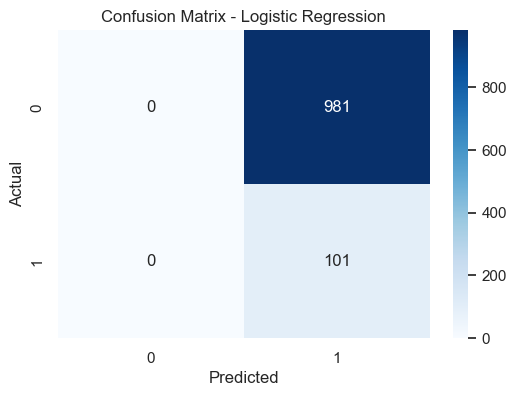

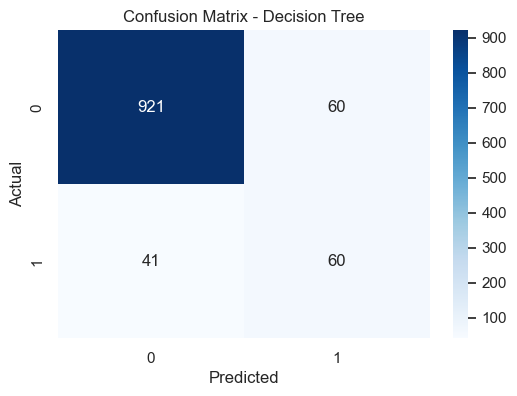

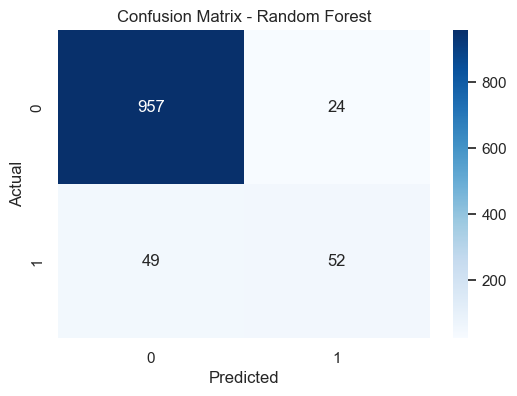

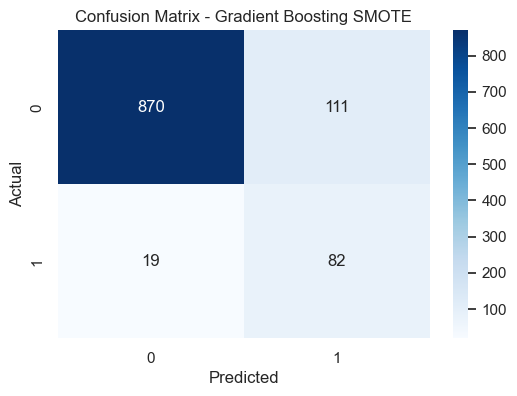

In [30]:
# ============================================
# 📌 7. CONFUSION MATRIX PLOTS
# ============================================
import seaborn as sns
import matplotlib.pyplot as plt

for name in models:
    y_pred = model_predictions[name][0]
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Plotting curves for Logistic Regression...


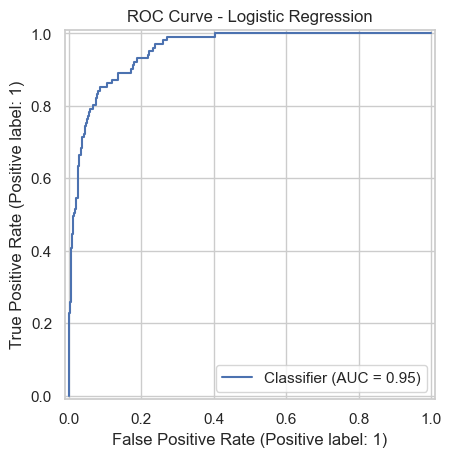

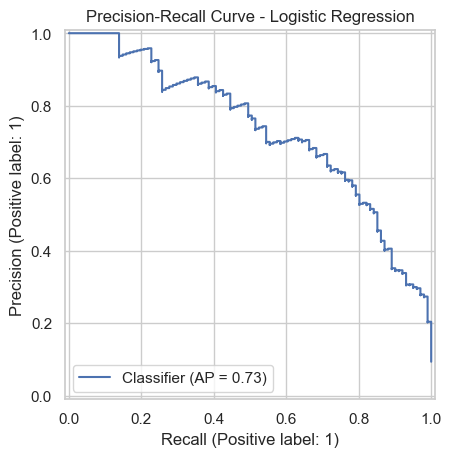

Plotting curves for Decision Tree...


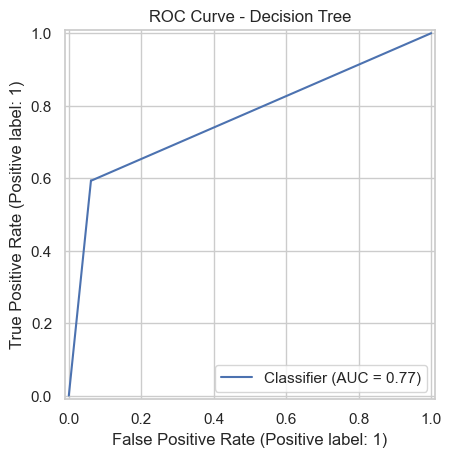

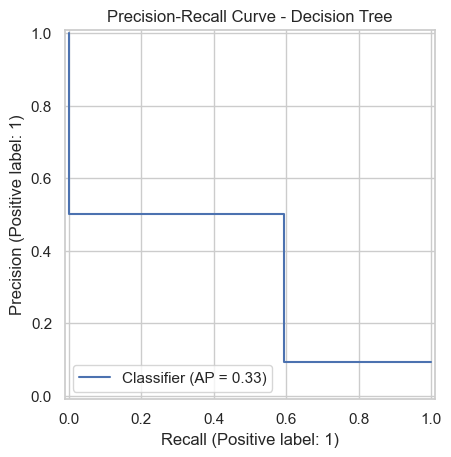

Plotting curves for Random Forest...


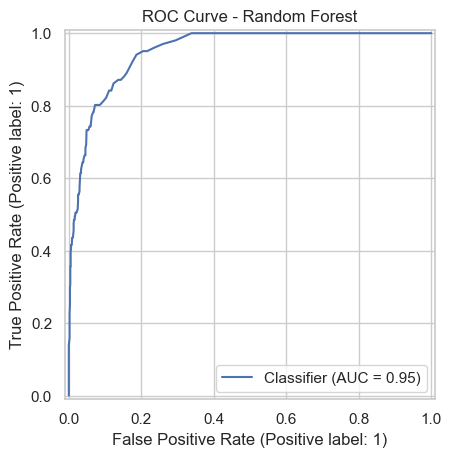

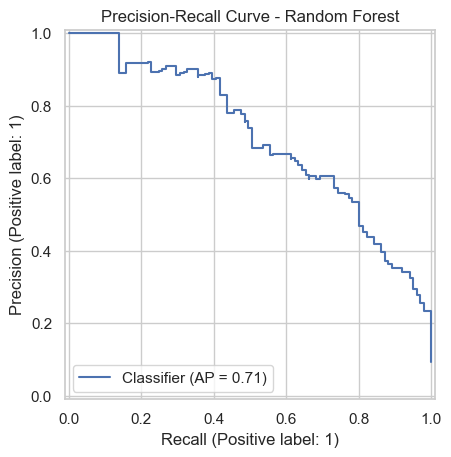

Plotting curves for Gradient Boosting SMOTE...


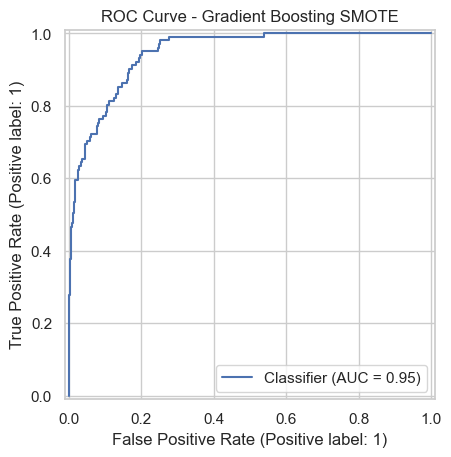

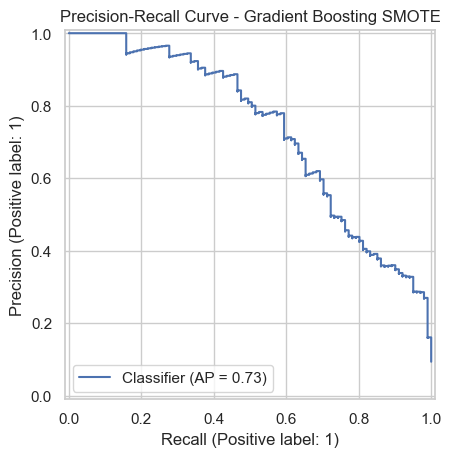

🎉 Evaluation Completed Successfully!


In [31]:
# ============================================
# 📌 8. ROC & PR CURVES
# ============================================
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

for name, model in models.items():
    print(f"Plotting curves for {name}...")
    y_prob = model_predictions[name][1]

    # ROC Curve
    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f"ROC Curve - {name}")
    plt.show()

    # Precision-Recall Curve
    PrecisionRecallDisplay.from_predictions(y_test, y_prob)
    plt.title(f"Precision-Recall Curve - {name}")
    plt.show()

print("🎉 Evaluation Completed Successfully!")
